# Project 4 - Data Wrangling of WeRateDogs's Archive
### By Eduardo Rossel

# Data Wrangling

## Gathering

Our starting point will be the archive provided to us, which has basic tweet data for the WeRateDogs twitter's account. Will convert this .csv file into our **archive** dataframe

In [12]:
# We will create a dataframe from the provided .csv document.
import pandas as pd

archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


Our next step will be to download the tweet image predictions from the provided url. We'll use the **requests** library to download the file programmatically and then create our **image_predictions** dataframe

In [13]:
# We will download The tweet image predictions using the requests library.
import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Next step is creating a file with the content of the response obtained
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [14]:
# Create a second df with the recently created file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


Our last step will be to use the Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Each tweet's JSON data will be written into it's own line. We will later read this .txt line by line to create our third and last dataframe, **tweepy_archive**.

(at minimum) tweet ID, retweet count, and favorite count.

In [15]:
import tweepy

consumer_key = 'TnmhnkZ88rznDXYxJKNORcA3q'
consumer_secret = 'nNytLcvzlLGnAweLWgQUQbeNcYMlwgqW2trlZlPCjzmA7FPho5'
access_token = '1364572892525117441-BTpiAv7GUuj6pGF90CFktFyyiMWG1K'
access_secret = 'IsZArG8MrZTjwfgjBg3wKwHTAUAsRlunjyMHboC0didWD'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

#test
tweet = api.get_status(1364641179707592706, tweet_mode='extended')
print(tweet._json)

{'created_at': 'Wed Feb 24 18:19:45 +0000 2021', 'id': 1364641179707592706, 'id_str': '1364641179707592706', 'full_text': 'Test', 'truncated': False, 'display_text_range': [0, 4], 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': []}, 'source': '<a href="https://mobile.twitter.com" rel="nofollow">Twitter Web App</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 1364572892525117441, 'id_str': '1364572892525117441', 'name': 'erossels', 'screen_name': 'erossels', 'location': '', 'description': '', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 0, 'friends_count': 0, 'listed_count': 0, 'created_at': 'Wed Feb 24 13:49:04 +0000 2021', 'favourites_count': 0, 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'verified': False, 'statuses_count': 1, 'lang': None, 'contributors_enabled'

In [22]:
# List comprehension for getting all of the tweets_ids
tweet_ids = [tweet for tweet in archive.tweet_id]

# Defining a function that gets the tweets in json format
import sys
def get_tweet(id):
    try: 
        api.get_status(id, tweet_mode='extended')._json
        return api.get_status(id, tweet_mode='extended')._json
    except:
        e = sys.exc_info()[0]
        print(e)

# Using our function in a list comprehension for getting all of the tweets ids.       
tweet_json = [get_tweet(id) for id in tweet_ids] 


<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>


Rate limit reached. Sleeping for: 148


<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>
<class 'tweepy.error.TweepError'>


Rate limit reached. Sleeping for: 337


<class 'tweepy.error.TweepError'>


Rate limit reached. Sleeping for: 394


<class 'tweepy.error.TweepError'>


Rate limit reached. Sleeping for: 421


In [26]:
# Let's see the content of our tweet_json file. 
tweet_json[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 

In [27]:
# Saving our tweet_json to a .txt document
import json
with open('tweet_json.txt', 'w') as outfile:
    json.dump(tweet_json, outfile)

In [648]:
# Reading the file in order to create a DataFrame with the data's not null tweets.
import json 
with open('tweet_json.txt') as f:
    tweets = f.read()

jsonData = json.loads(tweets)
jsonData_notnull = [element for element in jsonData if element]
jsonData_null  = [element for element in jsonData if not element]

api_archive = pd.DataFrame(jsonData_notnull)
api_archive.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,False,False,False,False,en,NaN,NaN,NaN,NaN,NaN


In [649]:
# A simple test on how to get to the hashtags.
api_archive.entities[4]['hashtags'][0]['text']

'BarkWeek'

In [650]:
# We'll just keep the most relevant columns from the tweets. 
api_archive_highlights = api_archive[['id','entities', 'favorited', 'favorite_count','retweeted','retweet_count']].copy()
api_archive_highlights['hashtags'] = api_archive_highlights.entities.apply(lambda x: [x['hashtags'][i]['text'] for i in range(0,len(x['hashtags']))])

In [651]:
api_archive_highlights.drop('entities', axis=1, inplace=True)
api_archive_highlights.head()

,id,favorited,favorite_count,retweeted,retweet_count,hashtags
0,892420643555336193,False,35040,False,7366,[]
1,892177421306343426,False,30346,False,5490,[]
2,891815181378084864,False,22809,False,3630,[]
3,891689557279858688,False,38311,False,7543,[]
4,891327558926688256,False,36587,False,8133,[BarkWeek]


### Assesing

Up next, we will be visually and programmatically assess each one of this dataset in order to garanty its quality and tidiness. This assessment will be made for the 3 dataframes already defined.

#### Archive's dataframe (twitter_archive_enhanced.csv)

**Quality**
* Maximum rating denominator is 170
* Maximun rating numerator is 1776
* Rating numerator may not be accurate
* Missing values in Type of dog (doggo, floofer, ...). May not be accurate
* Dataset contains replies and retweets
* Timestamp is of object type
* Missing some expanded urls (not really neccesary)


**Tidiness**
* All types of dog should be on a column (doggo, floofer, ...)



In [652]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [653]:
archive.text[1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

In [654]:
archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [655]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [656]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [657]:
print(archive.doggo.value_counts())
print(archive.floofer.value_counts())
print(archive.pupper.value_counts())
print(archive.puppo.value_counts())

None     2259
doggo      97
Name: doggo, dtype: int64
None       2346
floofer      10
Name: floofer, dtype: int64
None      2099
pupper     257
Name: pupper, dtype: int64
None     2326
puppo      30
Name: puppo, dtype: int64


In [658]:
archive.tweet_id.duplicated().sum()

0

In [659]:
# Checking out the retweets
archive[archive.retweeted_status_id*1> 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [660]:
# Checking out replys
archive[archive.in_reply_to_status_id*1> 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


#### Image predictions's dataframe (image-predictions.csv)

**Quality**  

* Predictions's data have different formats 

**Tidiness**  

* p, p_conf and p_dog should be in columns



In [661]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [662]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [663]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [664]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [665]:
image_predictions.duplicated().sum()

0

#### Api_archive's dataframe (Tweets retrieved with Tweepy)

**Quality**  

* Date of creation of tweets is Object Type, must be datetime

**Tidiness**  

* Api_archive and archive should be on the same datafram for tidiness.




In [666]:
api_archive_highlights.head()

,id,favorited,favorite_count,retweeted,retweet_count,hashtags
0,892420643555336193,False,35040,False,7366,[]
1,892177421306343426,False,30346,False,5490,[]
2,891815181378084864,False,22809,False,3630,[]
3,891689557279858688,False,38311,False,7543,[]
4,891327558926688256,False,36587,False,8133,[BarkWeek]


In [667]:
api_archive_highlights.tail()

,id,favorited,favorite_count,retweeted,retweet_count,hashtags
2326,666049248165822465,False,93,False,38,[]
2327,666044226329800704,False,259,False,122,[]
2328,666033412701032449,False,107,False,39,[]
2329,666029285002620928,False,118,False,41,[]
2330,666020888022790149,False,2343,False,443,[]


In [668]:
api_archive_highlights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              2331 non-null   int64 
 1   favorited       2331 non-null   bool  
 2   favorite_count  2331 non-null   int64 
 3   retweeted       2331 non-null   bool  
 4   retweet_count   2331 non-null   int64 
 5   hashtags        2331 non-null   object
dtypes: bool(2), int64(3), object(1)
memory usage: 77.5+ KB


In [669]:
api_archive_highlights.describe()

,id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7318.314028,2590.742600
std,6.823170e+16,11366.439135,4382.636656
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1269.500000,525.000000
50%,7.182469e+17,3173.000000,1209.000000
75%,7.986692e+17,8947.500000,3000.000000
max,8.924206e+17,150664.000000,74363.000000


In [670]:
api_archive_highlights.retweeted.sum()

0

In [671]:
api_archive_highlights.id.duplicated().sum()

0

In summary, the list of issues detected in our inspection are the following.

#### Archive's dataframe (twitter_archive_enhanced.csv)

**Quality**
* *Archive's dataframe:* 
    * Maximum rating denominator is 170
    * Maximun rating numerator is 1776
    * Rating numerator may not be accurate
    * Missing values in Type of dog (doggo, floofer, ...). May not be accurate
    * Dataset contains replies and retweets
    * Timestamp is of object type
    * Missing some expanded urls (not really neccesary)
* *Image predictions:*
    * Predictions's names have different formats 
* *Api_archive's dataframe:*
    * Date of creation of tweets is Object Type, must be datetime

**Tidiness**
* *Archive's dataframe:*
    * All types of dog should be on a column (doggo, floofer, ...)  
* *Image Predictions:*
    * p, p_conf and p_dog should be in columns
* *Api_archive's dataframe:*
    * Api_archive and archive should be on the same dataframe for tidiness sake.


## Cleaning

As there are no crucial issues regarding missing data, we'll start the cleaning stage by fixing tidiness's issues.
The 3 characteristics of tidy data are:
- Each variable forms a column.
- Each observation forms a row.
- Each type of observational unit forms a table.
In this case we will keep two tables: archive and our image predictions dataset. Even though we could join all tables in only one data set. These two tables keep different types of observational units. The first one, refers to tweets and their content, and the second one to predictions of the breed of the dogs made by a neural network.

### Fixing tidiness

* Issue Nº1  

**Describe**  

Join archive and api_archive's dataframe



**Code**

In [672]:
# renaming id column before merging
api_archive_highlights.rename(columns={'id':'tweet_id'},inplace=True)
api_archive_highlights.head()

,tweet_id,favorited,favorite_count,retweeted,retweet_count,hashtags
0,892420643555336193,False,35040,False,7366,[]
1,892177421306343426,False,30346,False,5490,[]
2,891815181378084864,False,22809,False,3630,[]
3,891689557279858688,False,38311,False,7543,[]
4,891327558926688256,False,36587,False,8133,[BarkWeek]


In [673]:
# Merging both tables (Left Join)
twitter_clean_archive = pd.merge(archive, api_archive_highlights, on='tweet_id', how='left')

**Test**

In [674]:
twitter_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

* Issue Nº2  

**Describe**

Use the melt function to create a column with the Type of Dog according to WeRateDogs classification.

**Code**

In [675]:
# Melting the columns to a new column in a new df
type_of_dog = pd.melt(twitter_clean_archive, id_vars=['tweet_id'], value_vars = ['doggo', 'floofer','pupper', 'puppo'], value_name='type_of_dog')
type_of_dog.head()

,tweet_id,variable,type_of_dog
0,892420643555336193,doggo,None
1,892177421306343426,doggo,None
2,891815181378084864,doggo,None
3,891689557279858688,doggo,None
4,891327558926688256,doggo,None


In [676]:
# Eliminate the None values
type_of_dog = type_of_dog[type_of_dog.type_of_dog != 'None']
type_of_dog.head()

,tweet_id,variable,type_of_dog
9,890240255349198849,doggo,doggo
43,884162670584377345,doggo,doggo
99,872967104147763200,doggo,doggo
108,871515927908634625,doggo,doggo
110,871102520638267392,doggo,doggo


In [677]:
# Checking or duplicates. This means they have more than one category assigned.
duplicated_ids= type_of_dog[type_of_dog.tweet_id.duplicated()].tweet_id

In [678]:
#Lets check the actual content of those Ids.
[str(id)+" "+api.get_status(id, tweet_mode='extended')._json['full_text'] for id in duplicated_ids]

["854010172552949760 At first I thought this was a shy doggo, but it's actually a Rare Canadian Floofer Owl. Amateurs would confuse the two. 11/10 only send dogs https://t.co/TXdT3tmuYk",
 '817777686764523521 This is Dido. She\'s playing the lead role in "Pupper Stops to Catch Snow Before Resuming Shadow Box with Dried Apple." 13/10 (IG: didodoggo) https://t.co/m7isZrOBX7',
 '808106460588765185 Here we have Burke (pupper) and Dexter (doggo). Pupper wants to be exactly like doggo. Both 12/10 would pet at same time https://t.co/ANBpEYHaho',
 '802265048156610565 Like doggo, like pupper version 2. Both 11/10 https://t.co/9IxWAXFqze',
 "801115127852503040 This is Bones. He's being haunted by another doggo of roughly the same size. 12/10 deep breaths pupper everything's fine https://t.co/55Dqe0SJNj",
 "785639753186217984 This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd",
 '7813

In [679]:
# We are going to keep only the first one. As we just observed there are
type_of_dog.drop('variable', axis=1, inplace=True)
type_of_dog.drop_duplicates(inplace= True)

In [680]:
twitter_clean_archive = pd.merge(twitter_clean_archive, type_of_dog, on='tweet_id', how='left')

In [681]:
# Finally dropping the columns with types of dogs.
twitter_clean_archive.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1, inplace=True)

**Test**

In [682]:
twitter_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2370 entries, 0 to 2369
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2370 non-null   int64  
 1   in_reply_to_status_id       79 non-null     float64
 2   in_reply_to_user_id         79 non-null     float64
 3   timestamp                   2370 non-null   object 
 4   source                      2370 non-null   object 
 5   text                        2370 non-null   object 
 6   retweeted_status_id         183 non-null    float64
 7   retweeted_status_user_id    183 non-null    float64
 8   retweeted_status_timestamp  183 non-null    object 
 9   expanded_urls               2311 non-null   object 
 10  rating_numerator            2370 non-null   int64  
 11  rating_denominator          2370 non-null   int64  
 12  name                        2370 non-null   object 
 13  favorited                   2345 

* Issue Nº3. 

**Describe**

Transform p1, p1_conf, p1_dog, p2, p2_conf, p2_dog and p3, p3_conf, p3_dog into predicted_breed, p_conf and p_dog columns.

**Code**

In [683]:
print(image_predictions.shape)
image_predictions.head()

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [684]:
# Lets build 3 different dataset and then merge them together on our axis=0
image_predictions_p1 = image_predictions[['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog']].copy()
image_predictions_p1['prediction'] = 'p1'
image_predictions_p1.rename(columns={'p1':'predicted_breed','p1_conf':'p_conf','p1_dog':'p_dog'}, inplace=True)
image_predictions_p2 = image_predictions[['tweet_id', 'jpg_url', 'img_num', 'p2', 'p2_conf', 'p2_dog']].copy()
image_predictions_p2['prediction'] = 'p2'
image_predictions_p2.rename(columns={'p2':'predicted_breed','p2_conf':'p_conf','p2_dog':'p_dog'}, inplace=True)
image_predictions_p3 = image_predictions[['tweet_id', 'jpg_url', 'img_num', 'p3', 'p3_conf', 'p3_dog']].copy()
image_predictions_p3['prediction'] = 'p3'
image_predictions_p3.rename(columns={'p3':'predicted_breed','p3_conf':'p_conf','p3_dog':'p_dog'}, inplace=True)

image_predictions_clean = pd.concat([image_predictions_p1, image_predictions_p2, image_predictions_p3],axis=0)
print(image_predictions_clean.shape)

(6225, 7)


**Test**

In [685]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,predicted_breed,p_conf,p_dog,prediction
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,p1
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,p1
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,p1
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,p1
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,p1


### Fixing Quality

In the following section, we'll keep working with our tidy datasets and we are going to focus on fixing the following quality issues. 

* *Archive's dataframe:* 
    * Maximum rating denominator is 170
    * Maximun rating numerator is 1776
    * Rating numerator may not be accurate
    * Missing values in Type of dog (doggo, floofer, ...). May not be accurate
    * Dataset contains replies and retweets
    * Timestamp is of object type
    * Missing some expanded urls (not really neccesary)
* *Image predictions:*
    * Predictions's data have different formats


* Issue Nº1

**Describe**

Delete retweets and replies from our twitter archive.

**Code**

In [686]:
# We know that retweets have an id, so we are going to keep the records in which we don't have it.
twitter_clean_archive = twitter_clean_archive[twitter_clean_archive.retweeted_status_id.isna()]
# Then remove the columns
twitter_clean_archive.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace = True)

**Test**

In [687]:
twitter_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2187 entries, 0 to 2369
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2187 non-null   int64  
 1   in_reply_to_status_id  79 non-null     float64
 2   in_reply_to_user_id    79 non-null     float64
 3   timestamp              2187 non-null   object 
 4   source                 2187 non-null   object 
 5   text                   2187 non-null   object 
 6   expanded_urls          2129 non-null   object 
 7   rating_numerator       2187 non-null   int64  
 8   rating_denominator     2187 non-null   int64  
 9   name                   2187 non-null   object 
 10  favorited              2180 non-null   object 
 11  favorite_count         2180 non-null   float64
 12  retweeted              2180 non-null   object 
 13  retweet_count          2180 non-null   float64
 14  hashtags               2180 non-null   object 
 15  type

* Issue Nº2  

**Describe**

Drop the rows that correspond to replies. In this case where *in_reply_to_status_id* is null

**Code**

In [688]:
# We know that replies have an id, so we are going to keep the records in which don't have it.
twitter_clean_archive = twitter_clean_archive[twitter_clean_archive.in_reply_to_status_id.isna()]
# Then remove the columns
twitter_clean_archive.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1, inplace = True)

**Test**

In [689]:
twitter_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2108 entries, 0 to 2369
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2108 non-null   int64  
 1   timestamp           2108 non-null   object 
 2   source              2108 non-null   object 
 3   text                2108 non-null   object 
 4   expanded_urls       2105 non-null   object 
 5   rating_numerator    2108 non-null   int64  
 6   rating_denominator  2108 non-null   int64  
 7   name                2108 non-null   object 
 8   favorited           2101 non-null   object 
 9   favorite_count      2101 non-null   float64
 10  retweeted           2101 non-null   object 
 11  retweet_count       2101 non-null   float64
 12  hashtags            2101 non-null   object 
 13  type_of_dog         347 non-null    object 
dtypes: float64(2), int64(3), object(9)
memory usage: 247.0+ KB


* Issue Nº3 and Nº4  

**Describe**

Recalculate the score numerator for all the dogs. We'll use a regular expresion to extract each numerator.  
Checking and forcing that the denominator is 10.

**Code**

In [690]:
# We use a regular expresion to extract rating in the format Numerator/Denominator
# We store the Ids of the tweets without score. 
tweets_without_score = twitter_clean_archive[twitter_clean_archive.text.str.extract(pat='(\s?[0-9]?[0-9]?[0-9]?[0-9]?\/10)')[0].isnull()].copy()['tweet_id']

In [691]:
# Lets checkout the content of those tweets without score
[api.get_status(id)._json['text'] for id in tweets_without_score]

['The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:… https://t.co/1MI8h6XjMY',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 "Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1",
 "Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12",
 'From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK',
 "Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa",
 "Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/Hppv

In [692]:
# We replace the values in rating_numerator and drop the 12 null values. Notice we are enforcing the denominator to be 10
twitter_clean_archive['rating_numerator'] = twitter_clean_archive.text.str.extract(pat='(\s?[0-9]?[0-9]?[0-9]?[0-9]?\/10)')[0]
twitter_clean_archive.dropna(axis=0, subset=['rating_numerator'],inplace=True)
twitter_clean_archive['rating_denominator'] = 10

In [693]:
twitter_clean_archive['rating_numerator'] = twitter_clean_archive['rating_numerator'].apply(lambda x: int(str(x).strip().split('/')[0]))

**Test**

In [764]:
twitter_clean_archive.rating_numerator.value_counts()

12    492
10    439
11    417
13    290
9     153
8      98
7      51
14     39
5      35
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

In [695]:
twitter_clean_archive.rating_denominator.unique()

array([10])

* Issue Nº5. 

**Describe**

Drop the rows where rating numerator is 1776 and 420, as they dont represen actual ratings. 
Change the value of rating numerator in other cases where values excedes 25.

**Code**

In [696]:
twitter_clean_archive.query("rating_numerator > 25")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorited,favorite_count,retweeted,retweet_count,hashtags,type_of_dog
701,786709082849828864,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10,Logan,False,17996.0,False,6004.0,[],NaN
771,778027034220126208,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,False,6428.0,False,1561.0,[],pupper
991,749981277374128128,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,False,4947.0,False,2375.0,[],NaN
1726,680494726643068929,2015-12-25 21:06:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,None,False,1654.0,False,463.0,[],NaN
2088,670842764863651840,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,False,22950.0,False,7958.0,[],NaN


In [697]:
[api.get_status(id)._json['text'] for id in twitter_clean_archive.query("rating_numerator > 25").tweet_id]

["This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.… https://t.co/PxjSmYHfYo",
 "This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD',
 'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY']

In [698]:
image_predictions_clean.query("tweet_id == 680494726643068929 ")

,tweet_id,jpg_url,img_num,predicted_breed,p_conf,p_dog,prediction
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,kuvasz,0.438627,True,p1
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,Samoyed,0.111622,True,p2
621,680494726643068929,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,1,Great_Pyrenees,0.064061,True,p3


In [699]:
twitter_clean_archive.shape

(2096, 14)

In [700]:
# Dropping tweets with ids 670842764863651840 (Rating references snopp dogg and weed consumption) and 749981277374128128 (rating references USA's Independence Year)
twitter_clean_archive = twitter_clean_archive[twitter_clean_archive.tweet_id != 670842764863651840]
twitter_clean_archive = twitter_clean_archive[twitter_clean_archive.tweet_id != 749981277374128128]
twitter_clean_archive.shape

(2094, 14)

In [701]:
# 786709082849828864's rating numerator is a reference to harry potter 9 3/4 station, so we are going to make it a 10
# 778027034220126208's rating numerator is 11 as seen in the text.
# 680494726643068929's rating numerator will be set to 11. 26 is the score of the whole group of pups.
twitter_clean_archive.loc[twitter_clean_archive.query("tweet_id == 786709082849828864").index,'rating_numerator'] = 10
twitter_clean_archive.loc[twitter_clean_archive.query("tweet_id == 778027034220126208").index,'rating_numerator'] = 11
twitter_clean_archive.loc[twitter_clean_archive.query("tweet_id == 680494726643068929").index,'rating_numerator'] = 11

**Test**


In [702]:
twitter_clean_archive.query("rating_numerator > 25")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,favorited,favorite_count,retweeted,retweet_count,hashtags,type_of_dog


* Issue Nº6  

**Describe**

Change the type of data of timestamp to datetime

**Code**

In [703]:
import datetime

twitter_clean_archive['timestamp'] = twitter_clean_archive.timestamp.apply(lambda x: pd.to_datetime(x))

**Test**

In [704]:
twitter_clean_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2369
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2094 non-null   int64              
 1   timestamp           2094 non-null   datetime64[ns, UTC]
 2   source              2094 non-null   object             
 3   text                2094 non-null   object             
 4   expanded_urls       2091 non-null   object             
 5   rating_numerator    2094 non-null   int64              
 6   rating_denominator  2094 non-null   int64              
 7   name                2094 non-null   object             
 8   favorited           2087 non-null   object             
 9   favorite_count      2087 non-null   float64            
 10  retweeted           2087 non-null   object             
 11  retweet_count       2087 non-null   float64            
 12  hashtags            2087 non-null 

In [705]:
twitter_clean_archive.type_of_dog.unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

* Issue Nº7  

**Describe**

Recalculate the type of dog by extracting the string for the type of dog on the tweet.

**Code**

In [706]:
def type_of_dog(text):
    if text.lower().find('doggo') != -1:
        return 'doggo'
    elif text.lower().find('puppo') != -1:
        return 'puppo'
    elif text.lower().find('pupper') != -1:
        return 'pupper'
    elif text.lower().find('floof') != -1:
        return 'floof'
    elif text.lower().find('floofer') != -1:
        return 'floof'
    else:
        return None
    
twitter_clean_archive['type_of_dog'] = twitter_clean_archive.text.apply(lambda x: type_of_dog(x))

**Test**



In [707]:
twitter_clean_archive.type_of_dog.value_counts()

pupper    240
doggo     101
floof      35
puppo      28
Name: type_of_dog, dtype: int64

In [708]:
archive.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Oliver      11
          ... 
Theo         1
Sprout       1
Opie         1
Noah         1
Mimosa       1
Name: name, Length: 957, dtype: int64

* Issue Nº8  

**Describe**

Re-assign the names of the pets

**Code**

In [746]:
import re
def get_name(string):
    list = re.findall('(\s[A-Z]\w+)',string)
    for element in list:
        if str(element).strip() not in ['We', 'This', 'Very', 'Both', 'Please', 'Thank', 'Not']:     
            return element
    return None
        
twitter_clean_archive['name'] = twitter_clean_archive.text.apply(lambda x: get_name(x))

**Test**

In [747]:
twitter_clean_archive.name.shape

(2094,)

In [748]:
twitter_clean_archive.name

0           Phineas
1             Tilly
2            Archie
3             Darla
4          Franklin
           ...     
2365         Enjoys
2366          Piers
2367            Big
2368     Mitsubishi
2369       Japanese
Name: name, Length: 2094, dtype: object

* Issue Nº 9  

**Describe**

Predictions's names have different formats 


**Code**

In [756]:
image_predictions_clean['predicted_breed'] = image_predictions_clean['predicted_breed'].apply(lambda x: str(x).strip().replace('_'," ").capitalize())

**Test**

In [757]:
image_predictions_clean.predicted_breed.unique()

array(['Welsh springer spaniel', 'Redbone', 'German shepherd',
       'Rhodesian ridgeback', 'Miniature pinscher',
       'Bernese mountain dog', 'Box turtle', 'Chow', 'Shopping cart',
       'Miniature poodle', 'Golden retriever', 'Gordon setter',
       'Walker hound', 'Pug', 'Bloodhound', 'Lhasa', 'English setter',
       'Hen', 'Desktop computer', 'Italian greyhound', 'Maltese dog',
       'Three-toed sloth', 'Ox', 'Malamute', 'Guinea pig',
       'Soft-coated wheaten terrier', 'Chihuahua',
       'Black-and-tan coonhound', 'Coho', 'Toy terrier',
       'Blenheim spaniel', 'Pembroke', 'Llama',
       'Chesapeake bay retriever', 'Curly-coated retriever', 'Dalmatian',
       'Ibizan hound', 'Border collie', 'Labrador retriever', 'Seat belt',
       'Snail', 'Miniature schnauzer', 'Airedale', 'Triceratops', 'Swab',
       'Hay', 'Hyena', 'Jigsaw puzzle', 'West highland white terrier',
       'Toy poodle', 'Giant schnauzer', 'Vizsla', 'Vacuum', 'Rottweiler',
       'Siberian husky', 'T

### Saving our cleaned datasets to .csv files

In [759]:
twitter_clean_archive.to_csv('twitter_archive_master.csv', index=False)
image_predictions_clean.to_csv('image_prediction_clean.csv', index=False)

# Data Analysis

Now that we have our data clean. We will explore this dataset in order to answer some questions:
* What's the average rating and how are ratings distributed?
* Does dog stage relates to getting a higher rating?
* Which breed of dogs gets higher ratings?
* Do tweets with higher rating gets more retweets?
* Which dogs stages gets more retweets?
* Which breed of dog gets more retweets?

### What's the average rating and how are ratings distributed?

One of the most noticeable features in WeRateDogs it's there score, as in most of cases its higher than 10. 
In fact, the rating average is just above 10. And most of the data, above first quarter is higher than 10. 
There's still some cases in which dogs get ratings lower than 10, but it's less than 25% of the data. It really seems that in WeRateDogs eyes, dogs are mostly beautiful and adorable companions.

In [760]:
twitter_clean_archive.rating_numerator.describe()

count    2094.000000
mean       10.611748
std         2.152494
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

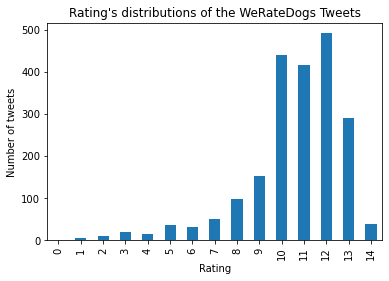

In [964]:
# Ploting the rating distributions for the tweets
import matplotlib.pyplot as plt
%matplotlib inline

twitter_clean_archive.groupby('rating_numerator').tweet_id.count().plot(kind='bar')
plt.title("Rating's distributions of the WeRateDogs Tweets")
plt.xlabel("Rating")
plt.ylabel("Number of tweets");
plt.savefig('images/rating_distribution.png')

<AxesSubplot:>

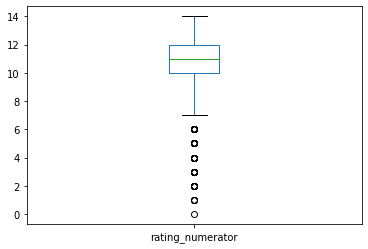

In [773]:
# A box plot for the rating_numerator
twitter_clean_archive.rating_numerator.plot(kind='box')

### Does dog stage relates to getting a higher rating?

Everyone knows puppys are cute and usually get the mayority of the atention in the streets. So it seems kind of obvious to see if puppers had the higher ratings. Plot twist, they didn't. Puppers do have an average rating of 10.6, but this is lower than puppos, doggos and floofers. Puppos, or teenager dogs, show a higher mean rating. Its important to show that puppers have the most appearences regarding dog stages, so this could play a part in puppers having a lower average.

It's worth noticing that only a fraction of our dataset had a dog stage, nearly 20%, so there is a lot missing and maybe puppers have a chance.

In [797]:
# Calculating the total and % of tweets with dog stage tags
print(twitter_clean_archive.groupby('type_of_dog').tweet_id.count().sum())
print(twitter_clean_archive.groupby('type_of_dog').tweet_id.count().sum()/twitter_clean_archive.tweet_id.count().sum())

404
0.1929321872015282


In [787]:
twitter_clean_archive.groupby('type_of_dog').tweet_id.count()

type_of_dog
doggo     101
floof      35
pupper    240
puppo      28
Name: tweet_id, dtype: int64

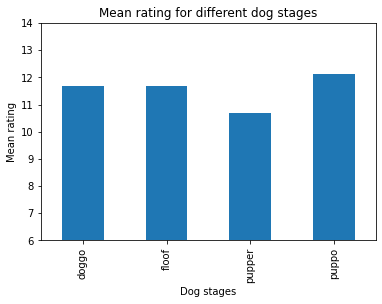

In [965]:
# Bar Plot of mean ratings for dog stages
twitter_clean_archive.groupby('type_of_dog').rating_numerator.mean().plot(kind='bar')
plt.title('Mean rating for different dog stages')
plt.xlabel('Dog stages')
plt.ylabel('Mean rating')
plt.ylim((6,14));
plt.savefig('images/rating_stage_dog.png')

In [794]:
# Lets see the average rating for each dog stage
twitter_clean_archive.groupby('type_of_dog').rating_numerator.mean()

type_of_dog
doggo     11.673267
floof     11.685714
pupper    10.679167
puppo     12.107143
Name: rating_numerator, dtype: float64

## Which breed of dogs gets higher ratings?

There are some breed of dogs that show a higher average rating, such as Samoyed, Chow and Golden Retriever. The last one, is also the breed that shows more appearences in the archive. As for the Samoyed and Chow, they are indeed popular, rating wise, but when order by count they are in 7th and 6th place. 

Other breed that achieve high scores are: Labrador, Pembroke (Corgi), and Chiguaguas

In [923]:
# We will work with a subset of our clean archive
twitter_clean_archive_subset = twitter_clean_archive[['tweet_id', 'rating_numerator']].copy()
twitter_clean_archive_subset.head()

# We'll also select the predictions but only those where it's actually a dog and just the higher predictions
image_predictions_clean_p1 = image_predictions_clean.query("p_dog == True and prediction == 'p1'")[['tweet_id', 'predicted_breed']].copy()

# Merge the two above dataframes
rating_breeds = pd.merge(twitter_clean_archive_subset, image_predictions_clean_p1, on='tweet_id', how='left')
print(rating_breeds.shape)

(2094, 3)


In [855]:
# Group by breed and get mean rating
rating_per_breed = rating_breeds.groupby('predicted_breed').rating_numerator.mean().sort_values(ascending=False)

In [854]:
# We'll work with the breeds that have more than 20 appearences, as we want the average to be representative.
rating_breeds_over20 = rating_breeds.groupby('predicted_breed').tweet_id.count().sort_values(ascending=False)[rating_breeds.groupby('predicted_breed').tweet_id.count().sort_values(ascending=False)> 20]

In [916]:
# Merging the series for ploting
ratings_df = pd.merge(rating_breeds_over20, rating_per_breed, on='predicted_breed')

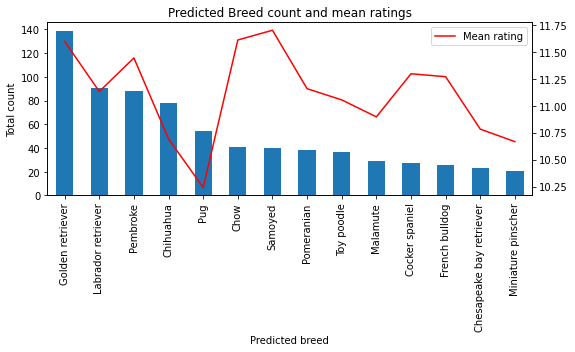

In [966]:
# Plotting top count of breed and their average ratings
ratings_df.tweet_id.plot(kind='bar', title='Predicted Breed count and mean ratings',rot=90, figsize=(8,5), xlabel='Predicted breed', ylabel='Total count')
ratings_df.rating_numerator.plot(secondary_y=True, color='red', rot=90, xlabel='Predicted breed', mark_right=True, label='Mean rating')
plt.tight_layout();
plt.legend();
plt.savefig('images/breed_ratings.png')




## Does the amount of retweets of a publication relates to rating, breed or dog stage?   

tweets with higher rating gets more retweets?
Which dogs stages gets more retweets?
Which breed of dog gets more retweets?

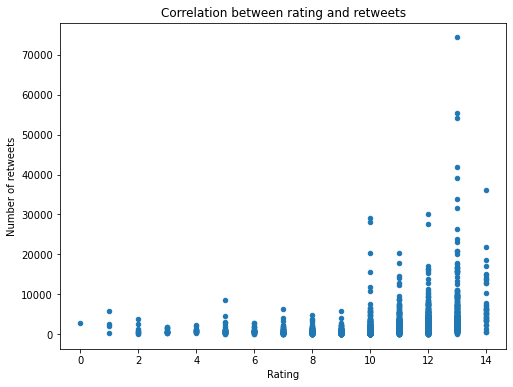

In [934]:
# Lets see if there is correlation between rating and retweets
twitter_clean_archive.plot(kind='scatter', x='rating_numerator', y='retweet_count', figsize=(8,6))
plt.title('Correlation between rating and retweets')
plt.xlabel('Rating')
plt.ylabel('Number of retweets');


In [928]:
# Correlation values
twitter_clean_archive[['rating_numerator','retweet_count']].corr()

,rating_numerator,retweet_count
rating_numerator,1.000000,0.298911
retweet_count,0.298911,1.000000


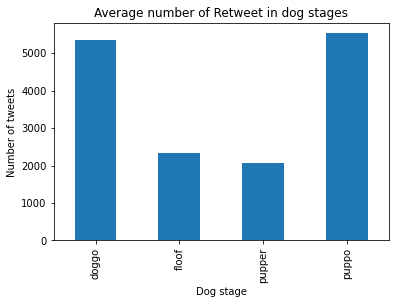

In [975]:
# Retweet average count for type of dog.
twitter_clean_archive.groupby('type_of_dog').retweet_count.mean().plot(kind='bar')
plt.title('Average number of Retweet in dog stages')
plt.xlabel('Dog stage')
plt.ylabel('Number of tweets')
plt.savefig('images/retweets_dog_stages.png');

In [970]:
twitter_clean_archive.groupby('type_of_dog').tweet_id.count()

type_of_dog
doggo     101
floof      35
pupper    240
puppo      28
Name: tweet_id, dtype: int64

In [938]:
# We will work with a subset of our clean archive
twitter_clean_archive_subset_2 = twitter_clean_archive[['tweet_id', 'retweet_count']].copy()
twitter_clean_archive_subset_2.head()

# We'll also select the predictions but only those where it's actually a dog and just the higher predictions
image_predictions_clean_p1_2 = image_predictions_clean.query("p_dog == True and prediction == 'p1'")[['tweet_id', 'predicted_breed']].copy()

# Merge the two above dataframes
rating_retweets = pd.merge(twitter_clean_archive_subset_2, image_predictions_clean_p1_2, on='tweet_id', how='left')


In [943]:
retweets_breed = rating_retweets.groupby('predicted_breed').retweet_count.mean()

In [942]:
# Will work with the breeds that have more than 20 appearences, as we want the average to be representative.
rating_breeds_over20_2 = rating_breeds.groupby('predicted_breed').tweet_id.count().sort_values(ascending=False)[rating_breeds.groupby('predicted_breed').tweet_id.count().sort_values(ascending=False)> 20]

In [955]:
rating_breeds_over20_2.index

Index(['Golden retriever', 'Labrador retriever', 'Pembroke', 'Chihuahua',
       'Pug', 'Chow', 'Samoyed', 'Pomeranian', 'Toy poodle', 'Malamute',
       'Cocker spaniel', 'French bulldog', 'Chesapeake bay retriever',
       'Miniature pinscher'],
      dtype='object', name='predicted_breed')

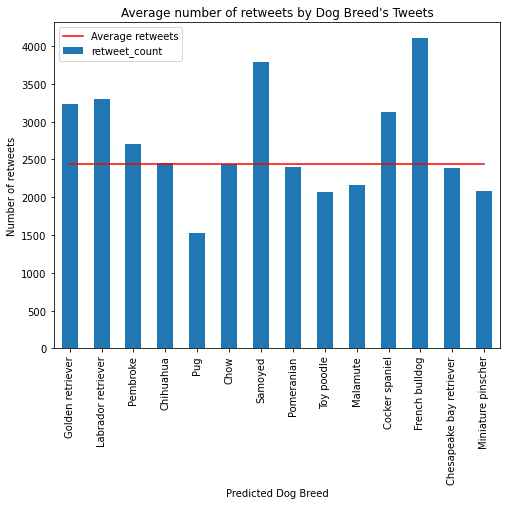

In [976]:
import numpy as np
pd.merge(rating_breeds_over20_2, retweets_breed, on='predicted_breed')['retweet_count'].plot(kind='bar', figsize=(8,6), )
plt.plot(rating_breeds_over20_2.index, np.ones(14)*twitter_clean_archive_subset_2.retweet_count.mean(), color='r', label='Average retweets')
plt.title("Average number of retweets by Dog Breed's Tweets")
plt.xlabel('Predicted Dog Breed')
plt.ylabel('Number of retweets')
plt.legend()
plt.savefig('images/retweets_breed.png');